In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the path to the file you'd like to load
file_path = "CAR DETAILS FROM CAR DEKHO.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "akshaydattatraykhare/car-details-dataset",
  file_path,
)

/var/folders/cn/0dflk63d5lj2brskz94j7c880000gn/T/ipykernel_54819/3100700778.py:14: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


# Car Price Dataset EDA

### Data Structure Overview

In [2]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.shape

(4340, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
# Check for seller types
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [6]:
# Check for fuel types
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [7]:
# Check for transmission types
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [8]:
# Check for owner types
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [9]:
# I am curious about the 'Test Drive Car' owner type
df[df['owner'] == 'Test Drive Car']



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1714,Ford Freestyle Titanium Diesel,2020,784000,101,Diesel,Dealer,Manual,Test Drive Car
1715,Ford Figo Titanium,2020,635000,101,Petrol,Dealer,Manual,Test Drive Car
1716,Ford Ecosport 1.5 Diesel Titanium,2020,1000000,101,Diesel,Dealer,Manual,Test Drive Car
1774,Ford Aspire Titanium BSIV,2020,828999,1010,Petrol,Dealer,Manual,Test Drive Car
1775,Ford EcoSport 1.5 Ti VCT MT Titanium BE BSIV,2020,1119000,1010,Petrol,Dealer,Manual,Test Drive Car
1776,Ford Figo Titanium,2020,746000,1111,Petrol,Dealer,Manual,Test Drive Car
1777,Ford Ecosport 1.5 Petrol Trend,2020,1030000,1010,Petrol,Dealer,Manual,Test Drive Car
1778,Ford EcoSport 1.5 TDCi Titanium Plus BSIV,2020,1334000,1010,Diesel,Dealer,Manual,Test Drive Car
1779,Ford Freestyle Titanium,2020,811999,1010,Petrol,Dealer,Manual,Test Drive Car
1780,Ford Ecosport Thunder Edition Diesel,2020,1331000,1010,Diesel,Dealer,Manual,Test Drive Car


In [10]:
# How many 'Test Drive Car' are there?
df['owner'].value_counts()['Test Drive Car']


np.int64(17)

### Data Cleaning (Missing Values & Duplicates)

In [11]:
# Check for missing values and if we need to impute these values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [12]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(763)

In [13]:
# Show rows with duplicate values
df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()).head(20)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
3912,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner
4016,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner
99,Audi A4 2.0 TDI 177 Bhp Premium Plus,2013,1150000,53000,Diesel,Dealer,Automatic,First Owner
2578,Audi A4 2.0 TDI 177 Bhp Premium Plus,2013,1150000,53000,Diesel,Dealer,Automatic,First Owner
554,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
573,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
592,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
611,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
899,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
918,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner


In [14]:
# Delete duplicate rows
df = df.drop_duplicates().reset_index(drop=True)

In [15]:
# Convert 'year' to 'Age' of the car
df['Age'] = 2025 - df['year']
df.drop('year', axis=1, inplace=True)

In [16]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,18
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,18
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,13
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,8
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,11


### Exploratory Plots for Categorigal Features

from this part we can see this dataset is highly imbalanced!
However, we are performing regression type of problem instead of classification problems.
Therefore, the imbalanced dataset does not matter that much.

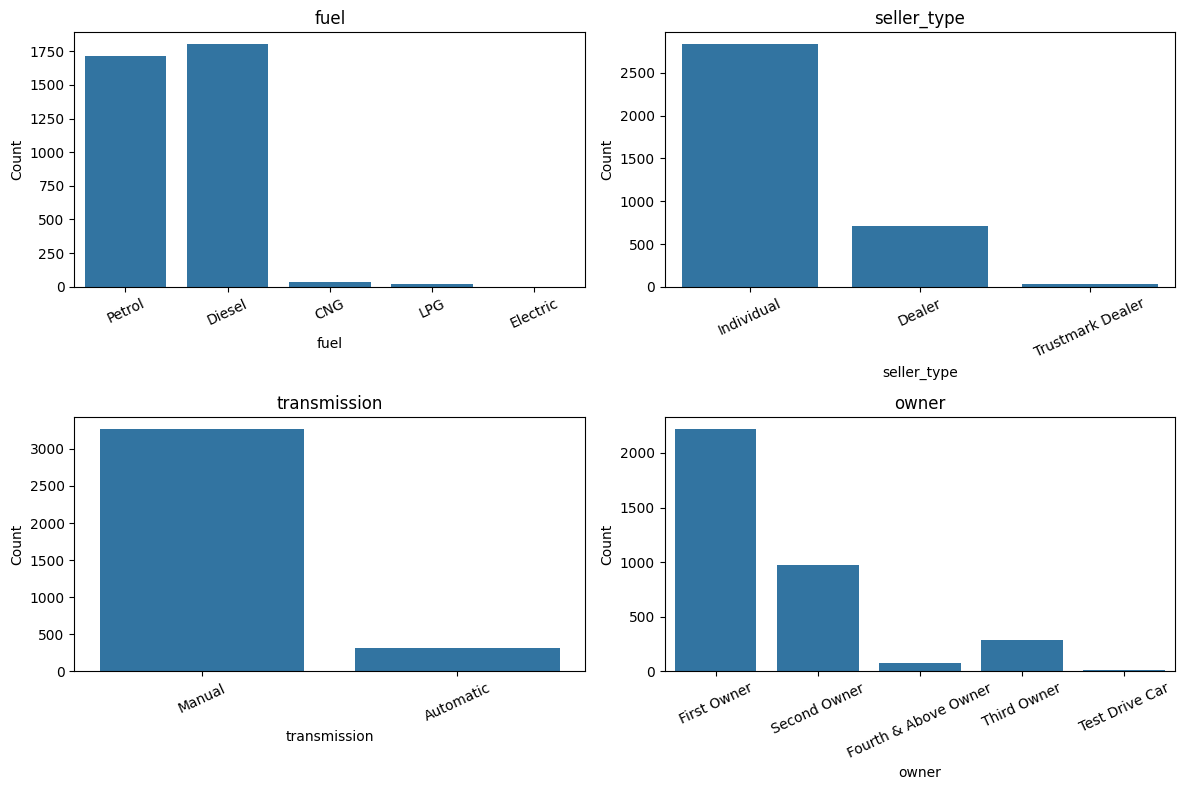

In [17]:
# Categorical columns in this dataset
cat_cols = ['fuel', 'seller_type', 'transmission', 'owner']

plt.figure(figsize=(12, 8))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=25)

plt.tight_layout()
plt.show()

### Exploratory Plots for Numerical Features

There are some outliers in the dataset.
Random Forest Regression is not very sensitive to outliers, but for liner regression and SVM regression (which we are using
in this file), the outliers could affect the training very very extremely!
Therefore, we have to process the outliers.

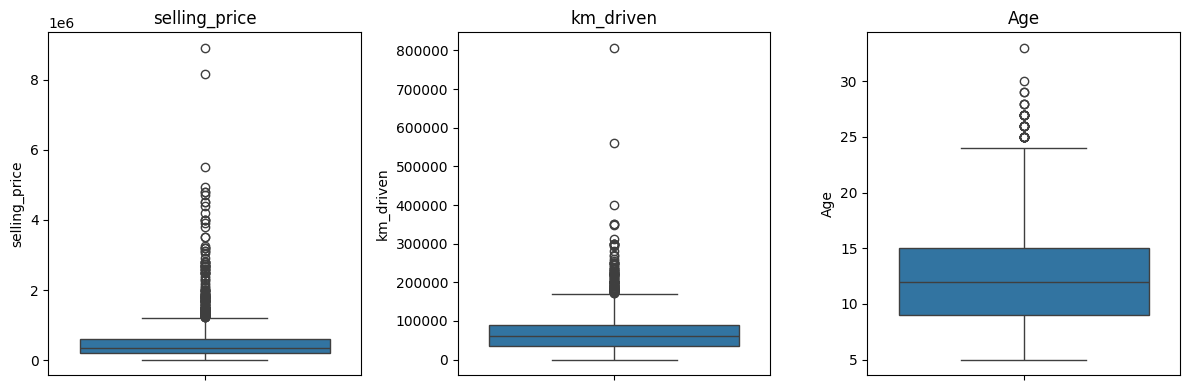

In [18]:
num_cols = ['selling_price', 'km_driven', 'Age']

plt.figure(figsize=(12, 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

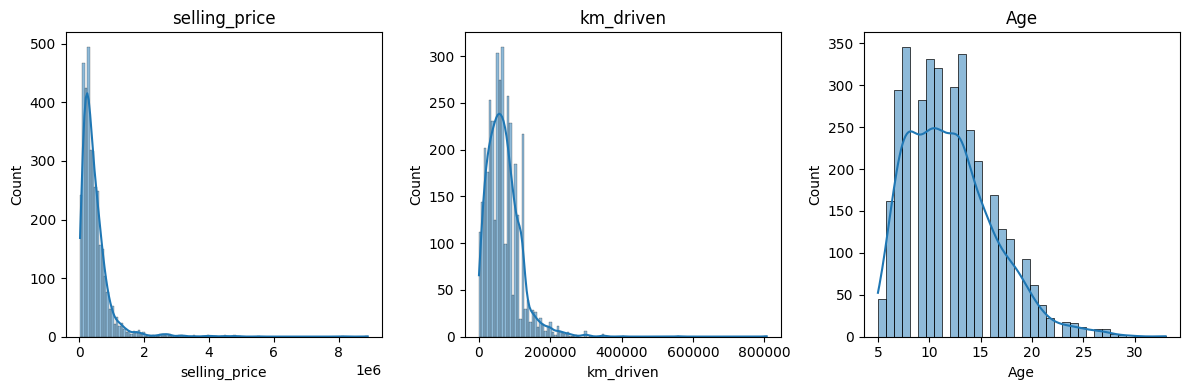

In [19]:
plt.figure(figsize=(12, 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [20]:
# cap km_driven at 99th percentile
# To reduce the impact of extremely high mileadge values on SVM, I cap km_driven at the 99th percentile.
upper_km = df['km_driven'].quantile(0.99)
print("99th percentile of km_driven:", upper_km)

df['km_driven'] = np.where(
    df['km_driven'] > upper_km,
    upper_km,
    df['km_driven']
)

99th percentile of km_driven: 223158.39999999985


In [21]:
df['km_driven'].max(), upper_km


(223158.39999999985, np.float64(223158.39999999985))

In [22]:
# Apply log transformation to compress the heavily-tailed distribution of selling_price.
# This reduces the impact of extreme high values and makes the feature more suitable
# for models such as SVM that are sensitive to scale and outliers.
df['selling_price_log'] = np.log1p(df['selling_price'])

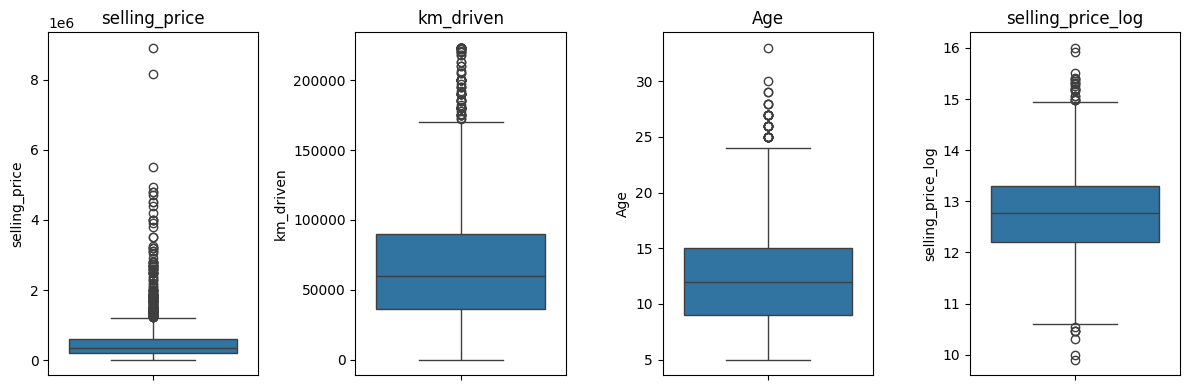

In [23]:
# Draw the diagram again after processing outliers
num_cols = ['selling_price', 'km_driven', 'Age', 'selling_price_log']

plt.figure(figsize=(12, 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [24]:
df.drop('selling_price', axis=1, inplace=True)

### One-Hot Encoding & Correlation Between Features and Price

In [25]:
# Change the name to brand and then perfrom one-hot encoding
df['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], shape=(1491,), dtype=object)

In [26]:
df['brand'] = df['name'].str.split().str[0]
print("Brand extracted from name:")
print(df['brand'].unique())

Brand extracted from name:
['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']


In [27]:
df['brand'] = df['brand'].replace('Land', 'Land Rover')

In [28]:
df.drop('name', axis=1, inplace=True)

In [29]:
# One-hot encoding
df_encoded = pd.get_dummies(
    df,
    columns=['fuel', 'seller_type', 'transmission', 'owner', 'brand'],
    drop_first=True
)

In [30]:
# Convert True/False to 0/1
bool_cols = df_encoded.select_dtypes('bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)


In [31]:
df_encoded.head()

,km_driven,Age,selling_price_log,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,70000.0,18,11.002117,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,50000.0,18,11.813037,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,100000.0,13,13.304687,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,46000.0,8,12.429220,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,141000.0,11,13.017005,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Drop the brand name because maybe it does not play too many roles in price prediction
# df_encoded.drop('name', axis=1, inplace=True)

In [32]:
df_encoded.corr()['selling_price_log'].sort_values(ascending=False)


selling_price_log               1.000000
fuel_Diesel                     0.382095
brand_Audi                      0.194056
brand_Toyota                    0.183297
brand_BMW                       0.176964
brand_Mercedes-Benz             0.152224
brand_Mahindra                  0.143080
brand_Land Rover                0.107514
brand_Honda                     0.100859
seller_type_Trustmark Dealer    0.089979
owner_Test Drive Car            0.084989
brand_Jaguar                    0.082751
brand_Volvo                     0.079626
brand_Ford                      0.064890
brand_Jeep                      0.053439
brand_MG                        0.049101
brand_Volkswagen                0.041458
brand_Mitsubishi                0.040407
brand_Isuzu                     0.030507
brand_Skoda                     0.027957
brand_Kia                       0.027578
brand_Renault                   0.027255
brand_Nissan                    0.027066
brand_Force                     0.000488
fuel_Electric   

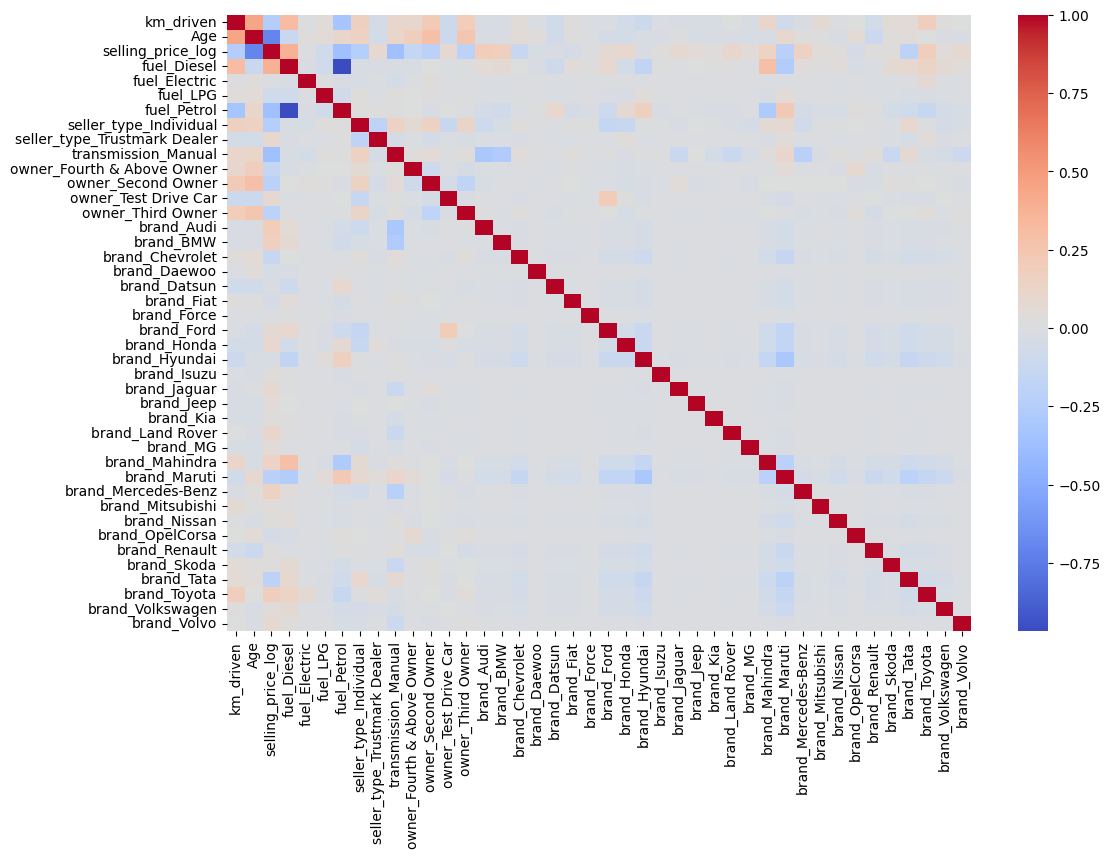

In [33]:
# Generate heatmap to visualize correlations
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm')
plt.show()

# Model Training

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error

# Prepare features and target variable
X = df_encoded.drop(['selling_price_log'], axis=1)
y = df_encoded['selling_price_log']

In [35]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [36]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# Define SVR model (RBF kernel)
svr = SVR(kernel='rbf')

In [38]:
# Hyperparameter search grid
param_grid = {
    'C': [1, 5, 10, 20, 50, 100, 200, 300],
    'gamma': ['scale', 'auto', 0.005, 0.01, 0.02, 0.05, 0.1],
    'epsilon': [0.01, 0.05, 0.08, 0.1, 0.15, 0.2]
}

In [39]:
# GridSearchCV settings
grid_search = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
)

In [40]:
# Train (on the scaled training set)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)


Best parameters: {'C': 5, 'epsilon': 0.1, 'gamma': 0.005}
Best CV score: 0.7862768261902008


In [41]:
# Using the best model
best_svr = grid_search.best_estimator_

In [42]:
# Convert log price predictions back to original scale
y_pred_log = best_svr.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

# Evaluation

In [48]:
# Compute and print R² for train and test sets
train_r2 = best_svr.score(X_train, y_train)
test_r2 = r2_score(y_true, y_pred)

print(f"Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")

Train R²: 0.8151 | Test R²: 0.6042


In [43]:
# Evaluation metrics

medae = median_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("Evaluation Metrics:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"MedAE: {medae:,.2f}")
print(f"R²:   {r2:.4f}")

Evaluation Metrics:
RMSE: 357093.26
MAE:  139790.18
MedAE: 360,956.34
R²:   0.6042


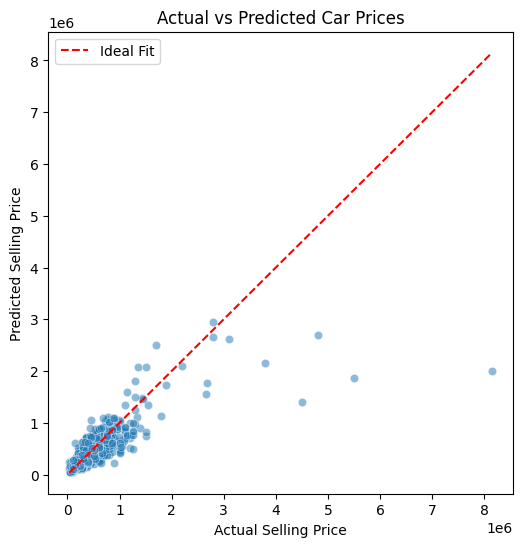

In [44]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_true, y=y_pred, alpha=0.5)
plt.plot([y_true.min(), y_true.max()], 
         [y_true.min(), y_true.max()], 
         'r--', label='Ideal Fit')

plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.legend()
plt.show()


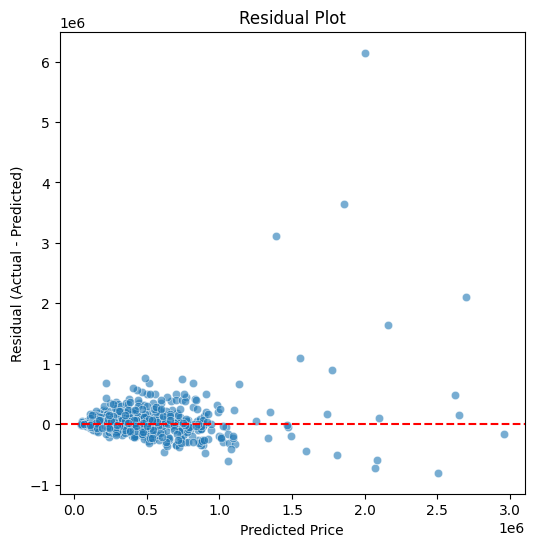

In [45]:
# Residual plot
residuals = y_true - y_pred

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()


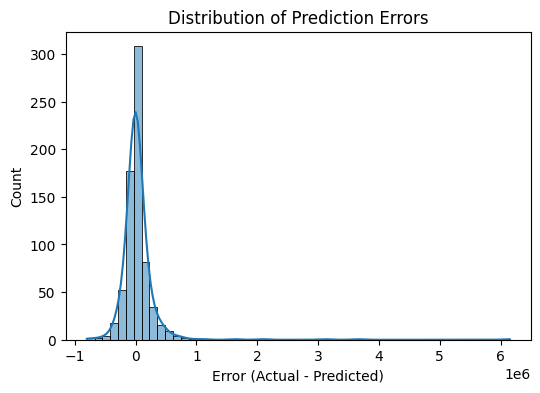

In [46]:
# Error Distribution Plot
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.show()